### Simple Recommender System for new anime file

In [ ]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#loading the dataset
anime_data = pd.read_csv('DATA/Anime_data.csv')

In [4]:
#viewing the data
anime_data.head(3)

,Anime_id,Title,Genre,Synopsis,Type,Producer,Studio,Rating,ScoredBy,Popularity,Members,Episodes,Source,Aired,Link
0,1,Cowboy Bebop,"['Action', 'Adventure', 'Comedy', 'Drama', 'Sc...","In the year 2071, humanity has colonized sever...",TV,['Bandai Visual'],['Sunrise'],8.81,363889.0,39.0,704490.0,26.0,Original,"Apr 3, 1998 to Apr 24, 1999",https://myanimelist.net/anime/1/Cowboy_Bebop
1,5,Cowboy Bebop: Tengoku no Tobira,"['Action', 'Space', 'Drama', 'Mystery', 'Sci-Fi']","Another day, another bounty—such is the life o...",Movie,"['Sunrise', 'Bandai Visual']",['Bones'],8.41,111187.0,475.0,179899.0,1.0,Original,"Sep 1, 2001",https://myanimelist.net/anime/5/Cowboy_Bebop__...
2,6,Trigun,"['Action', 'Sci-Fi', 'Adventure', 'Comedy', 'D...","Vash the Stampede is the man with a $$60,000,0...",TV,['Victor Entertainment'],['Madhouse'],8.31,197451.0,158.0,372709.0,26.0,Manga,"Apr 1, 1998 to Sep 30, 1998",https://myanimelist.net/anime/6/Trigun


In [5]:
#checking the shape of the data
anime_data.shape

(17002, 15)

In [6]:
#renaming the column names
anime_data = anime_data.rename(columns={'Anime_id': 'anime_id', 'Title': 'title','Genre':'genres','Synopsis':'synopsis',
                                       'Type':'anime_type','Producer':'producer','Studio':'studio','Rating':'rating','ScoredBy':'scored_by','Popularity':'popularity',
                                       'Members':'members','Episodes':'num_of_episodes','Source':'anime_source'})

In [7]:
#checking the datatype of each column
anime_data.dtypes

anime_id             int64
title               object
genres              object
synopsis            object
anime_type          object
producer            object
studio              object
rating             float64
scored_by          float64
popularity         float64
members            float64
num_of_episodes    float64
anime_source        object
Aired               object
Link                object
dtype: object

In [8]:
#checking out the number of unique animes
len(anime_data['title'].unique())

16737

In [9]:
#creating the function to remove the characters
import re
def clean_up(s):
    return re.sub(r"[^\sa-zA-Z0-9\.\,\;]","",str(s))

In [11]:
anime_data['title'] = anime_data['title'].apply(clean_up)
anime_data['genres'] = anime_data['genres'].apply(clean_up)
anime_data['producer'] = anime_data['producer'].apply(clean_up)
anime_data['studio'] = anime_data['studio'].apply(clean_up)

In [12]:
#viewing the cleaned data
anime_data.head(2)

,anime_id,title,genres,synopsis,anime_type,producer,studio,rating,scored_by,popularity,members,num_of_episodes,anime_source,Aired,Link
0,1,Cowboy Bebop,"Action, Adventure, Comedy, Drama, SciFi, Space","In the year 2071, humanity has colonized sever...",TV,Bandai Visual,Sunrise,8.81,363889.0,39.0,704490.0,26.0,Original,"Apr 3, 1998 to Apr 24, 1999",https://myanimelist.net/anime/1/Cowboy_Bebop
1,5,Cowboy Bebop Tengoku no Tobira,"Action, Space, Drama, Mystery, SciFi","Another day, another bounty—such is the life o...",Movie,"Sunrise, Bandai Visual",Bones,8.41,111187.0,475.0,179899.0,1.0,Original,"Sep 1, 2001",https://myanimelist.net/anime/5/Cowboy_Bebop__...


In [13]:
#cleaning the data by dropping columns that will not be used
anime_data = anime_data.drop(columns=['Aired','Link','num_of_episodes'])

In [14]:
anime_data.head(3)

,anime_id,title,genres,synopsis,anime_type,producer,studio,rating,scored_by,popularity,members,anime_source
0,1,Cowboy Bebop,"Action, Adventure, Comedy, Drama, SciFi, Space","In the year 2071, humanity has colonized sever...",TV,Bandai Visual,Sunrise,8.81,363889.0,39.0,704490.0,Original
1,5,Cowboy Bebop Tengoku no Tobira,"Action, Space, Drama, Mystery, SciFi","Another day, another bounty—such is the life o...",Movie,"Sunrise, Bandai Visual",Bones,8.41,111187.0,475.0,179899.0,Original
2,6,Trigun,"Action, SciFi, Adventure, Comedy, Drama, Shounen","Vash the Stampede is the man with a $$60,000,0...",TV,Victor Entertainment,Madhouse,8.31,197451.0,158.0,372709.0,Manga


In [15]:
#checking for null values
anime_data.isnull().sum()

anime_id           0
title              0
genres             0
synopsis        1419
anime_type       634
producer           0
studio             0
rating          2577
scored_by       3775
popularity       634
members            0
anime_source    1927
dtype: int64

In [16]:
#dropping the rows that have null values for both rating and synopsis
anime_data.dropna(subset = ['synopsis','rating'], how = 'all', inplace = True)

In [17]:
anime_data.isnull().sum()

anime_id           0
title              0
genres             0
synopsis         615
anime_type       537
producer           0
studio             0
rating          1773
scored_by       2984
popularity       144
members            0
anime_source    1830
dtype: int64

## EDA

In [19]:
#obtaining the number of unique genres
anime_genres = anime_data['genres'].copy()
unique_genres = []
for genre in anime_genres:
    store = genre.split(',')
    for x in store:
        if x not in unique_genres:
            unique_genres.append(x)
print(unique_genres)

['Action', ' Adventure', ' Comedy', ' Drama', ' SciFi', ' Space', ' Mystery', ' Shounen', ' Magic', ' Police', ' Supernatural', 'Adventure', ' Fantasy', ' Sports', 'Comedy', ' Josei', ' Romance', ' Slice of Life', 'Slice of Life', ' Cars', ' Seinen', 'Drama', ' Horror', ' Psychological', ' Thriller', ' Super Power', ' Martial Arts', ' School', ' Ecchi', ' Vampire', ' Military', ' Historical', ' Dementia', ' Mecha', 'SciFi', ' Demons', ' Samurai', 'Samurai', 'Game', ' Shoujo', ' Harem', ' Music', 'Harem', 'Military', 'Space', ' Shoujo Ai', 'Music', ' Game', 'Mecha', 'Supernatural', ' Shounen Ai', ' Kids', 'Historical', 'Mystery', 'Magic', 'School', ' Hentai', 'Hentai', ' Parody', 'Fantasy', 'Horror', 'Ecchi', 'Kids', 'Sports', ' Yuri', 'Dementia', 'Romance', 'Police', 'Psychological', 'Shounen', 'Demons', 'Parody', ' Yaoi', 'Shoujo', 'Super Power', 'Cars', 'Vampire', 'Martial Arts', 'Yaoi', 'Thriller', 'Seinen', 'Josei', 'nan']


In [20]:
#getting the number of anime under each type
anime_data.groupby('anime_type')['title'].count()

anime_type
Movie      2747
Music      1089
ONA        1353
OVA        3770
Special    2093
TV         4576
Unknown      33
Name: title, dtype: int64

In [21]:
#getting the number of anime under each source
anime_data.groupby('anime_source')['title'].count()

anime_source
4-koma manga      227
Book               86
Card game          52
Digital manga      11
Game              646
Light novel       555
Manga            3029
Music             354
Novel             360
Original         3706
Other             438
Picture book      104
Radio               9
Unknown          3825
Visual novel      800
Web manga         166
Name: title, dtype: int64

In [22]:
#getting the producer under each source
anime_data.groupby('producer')['title'].count().sort_values(ascending=False).head()

producer
nan               8588
NHK                426
Sanrio             147
Pink Pineapple     143
Bandai Visual      111
Name: title, dtype: int64

In [23]:
#getting the number of anime under each studio
anime_data.groupby('studio')['title'].count().sort_values(ascending=False)

studio
nan                                       8310
Toei Animation                             642
Sunrise                                    398
Madhouse                                   282
J.C.Staff                                  279
                                          ... 
Passione, Creators in Pack                   1
Picograph                                    1
Picona                                       1
Picture Magic, Rikuentai                     1
Nippon Animation, SynergySP, Shirogumi       1
Name: title, Length: 772, dtype: int64

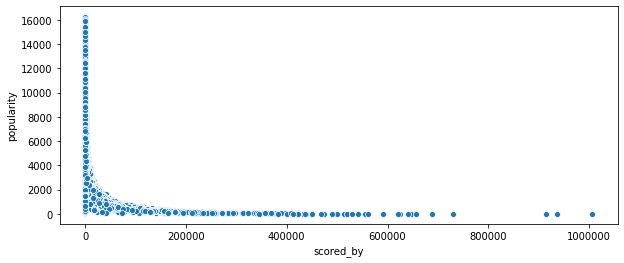

In [24]:
#plotting the popularity against the people that rated the anime
plt.figure(figsize = (10,4))
sns.scatterplot(x = "scored_by",y = "popularity",data = anime_data)

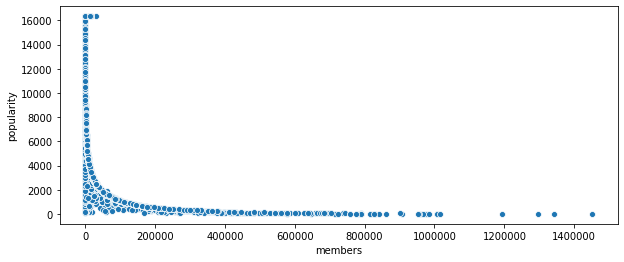

In [25]:
#plotting the popularity against the members
plt.figure(figsize = (10,4))
#plt.xlim(0,200000)
sns.scatterplot(x = "members",y = "popularity",data = anime_data)

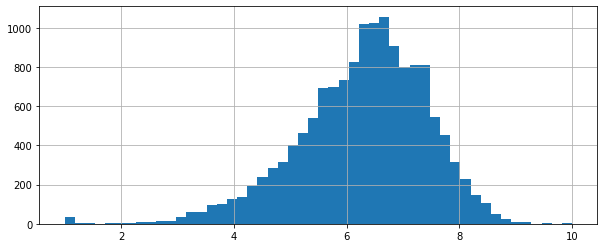

In [26]:
#plotting a graph of ratings
plt.figure(figsize = (10,4))
anime_data['rating'].hist(bins = 50)

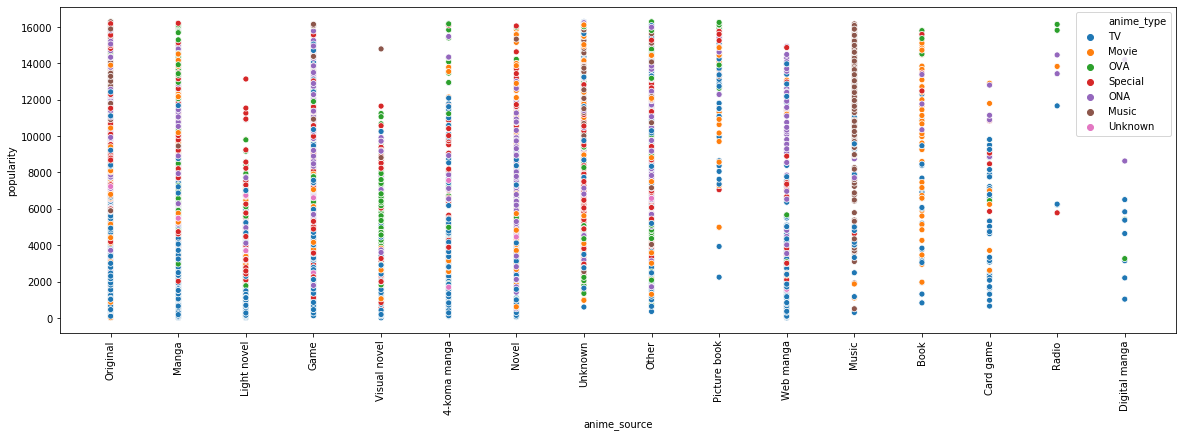

In [27]:
#plotting a graph to show how popularity varies with anime_source
plt.figure(figsize = (20,6))
plt.xticks(rotation = 90)
sns.scatterplot(x = "anime_source",y = "popularity", hue= 'anime_type', data = anime_data)

# A recommender system that recommends the highest rated anime to a user

Using the Weighted Average Formula AND the members column based on popularity
WR = (RV + Cm/V+m) where:
- V is the number of votes
- m is minimum votes required to be listed
- R is rating average of the anime
- C is mean vote across whole report

In [28]:
#finding the weighted average for each anime
V = anime_data['scored_by']                       #number of votes for each anime
R = anime_data['rating']                     #average voting rating for each anime
C = anime_data['rating'].mean()              #mean vote across the whole report
m = anime_data['scored_by'].quantile(0.80)        #minimum votes requires to be among the top 

anime_data['weighted_avg'] = ((R*V)+(C*m))/(V+m)     #used by imdb to calculate weighted average of movies

In [29]:
anime_data.head(3)

,anime_id,title,genres,synopsis,anime_type,producer,studio,rating,scored_by,popularity,members,anime_source,weighted_avg
0,1,Cowboy Bebop,"Action, Adventure, Comedy, Drama, SciFi, Space","In the year 2071, humanity has colonized sever...",TV,Bandai Visual,Sunrise,8.81,363889.0,39.0,704490.0,Original,8.762879
1,5,Cowboy Bebop Tengoku no Tobira,"Action, Space, Drama, Mystery, SciFi","Another day, another bounty—such is the life o...",Movie,"Sunrise, Bandai Visual",Bones,8.41,111187.0,475.0,179899.0,Original,8.285527
2,6,Trigun,"Action, SciFi, Adventure, Comedy, Drama, Shounen","Vash the Stampede is the man with a $$60,000,0...",TV,Victor Entertainment,Madhouse,8.31,197451.0,158.0,372709.0,Manga,8.241454


In [30]:
#recommending the top 10 anime with the highest weighted average
total_anime = anime_data.copy()
wavg = total_anime.sort_values('weighted_avg', ascending = False)
wavg.head(3)

,anime_id,title,genres,synopsis,anime_type,producer,studio,rating,scored_by,popularity,members,anime_source,weighted_avg
3634,5114,Fullmetal Alchemist Brotherhood,"Action, Military, Adventure, Comedy, Drama, Ma...","""In order for something to be obtained, someth...",TV,"Aniplex, Square Enix, Mainichi Broadcasting Sy...",Bones,9.25,730784.0,4.0,1194518.0,Manga,9.222182
10110,32281,Kimi no Na wa.,"Supernatural, Drama, Romance, School","Mitsuha Miyamizu, a high school girl, yearns t...",Movie,"Kadokawa Shoten, Toho, Sound Team Don Juan, La...",CoMix Wave Films,9.19,467437.0,15.0,724490.0,Original,9.147615
5031,9253,Steins;Gate,"Thriller, SciFi",The self-proclaimed mad scientist Rintarou Oka...,TV,"Frontier Works, Media Factory, Movic, ATX, Kad...",White Fox,9.14,561405.0,7.0,1005781.0,Visual novel,9.105232


Text(0, 0.5, 'Anime Title')

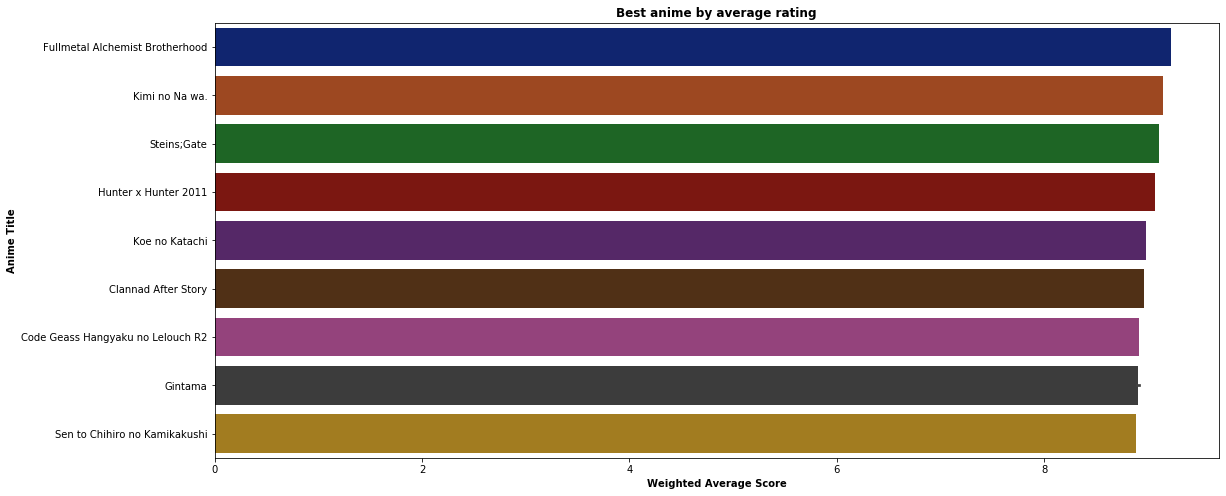

In [31]:
#plotting the top 10 anime according to weighted average
plt.figure(figsize=(18,8))

ax = sns.barplot(x = wavg['weighted_avg'].head(10), y = wavg['title'].head(10), data =wavg, palette='dark')

plt.title('Best anime by average rating', weight = 'bold')
plt.xlabel('Weighted Average Score', weight = 'bold')
plt.ylabel('Anime Title', weight = 'bold')

#plt.savefig('best_anime using weighted avg.png')

# Recommending according to the anime with the largest members

In [33]:
#sorting data according to their popularity
anime_members = anime_data.copy()
anime_members = anime_members.sort_values('members',ascending = False)
anime_members.head(3)

,anime_id,title,genres,synopsis,anime_type,producer,studio,rating,scored_by,popularity,members,anime_source,weighted_avg
1257,1535,Death Note,"Mystery, Police, Psychological, Supernatural, ...","A shinigami, as a god of death, can kill any p...",TV,"VAP, Konami, Ashi Production, Nippon Televisio...",Madhouse,8.67,1006242.0,1.0,1451708.0,Manga,8.653711
6383,16498,Shingeki no Kyojin,"Action, Military, Mystery, Super Power, Drama,...","Centuries ago, mankind was slaughtered to near...",TV,"Production I.G, Dentsu, Mainichi Broadcasting ...",Wit Studio,8.49,936784.0,2.0,1340641.0,Manga,8.473834
5818,11757,Sword Art Online,"Action, Adventure, Fantasy, Game, Romance","In the year 2022, virtual reality has progress...",TV,"Aniplex, Genco, DAX Production, ASCII Media Works",A1 Pictures,7.64,913806.0,3.0,1297309.0,Light novel,7.629826


Text(0, 0.5, 'Anime Title')

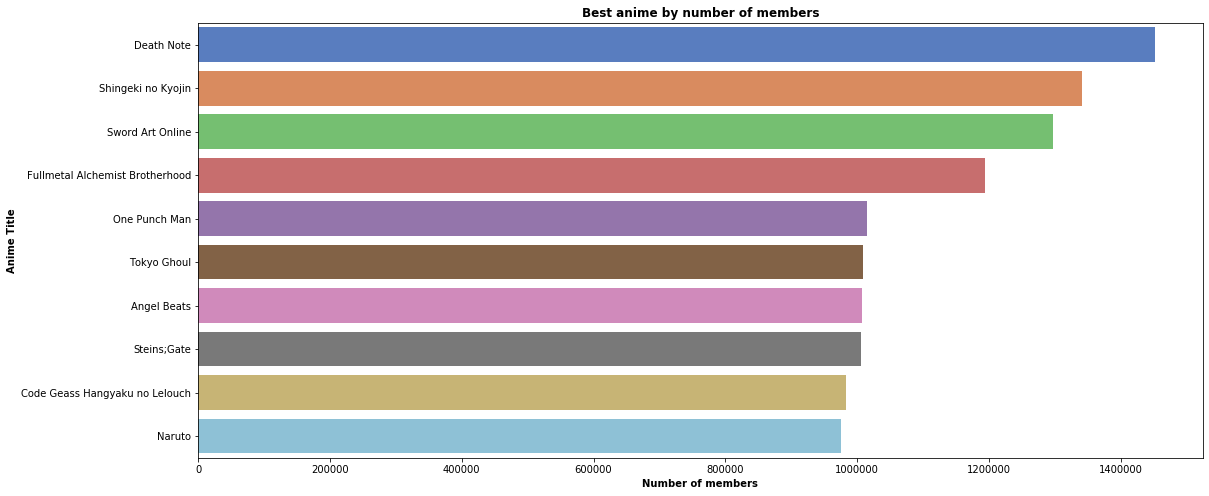

In [34]:
#plotting the top 10 anime according to their members
plt.figure(figsize=(18,8))

ax = sns.barplot(x = anime_members['members'].head(10), y = anime_members['title'].head(10), data = anime_members, palette='muted')

plt.title('Best anime by number of members', weight = 'bold')
plt.xlabel('Number of members', weight = 'bold')
plt.ylabel('Anime Title', weight = 'bold')

#plt.savefig('best_anime using members.png')

# Recommending anime according to their popularity

In [35]:
#sorting data according to their popularity
anime_popular = anime_data.copy()
anime_popular = anime_popular.dropna()
anime_popular = anime_popular.sort_values('popularity', ascending = False)
anime_popular.head(3)

,anime_id,title,genres,synopsis,anime_type,producer,studio,rating,scored_by,popularity,members,anime_source,weighted_avg
14568,39103,Sanbiki no Kobuta no Koutsuu Anzen,Kids,A traffic safety anime aimed at infants to low...,OVA,nan,nan,1.0,1.0,16288.0,14.0,Other,6.287104
14615,39155,Kumasan no My Home,Kids,"A fire safety anime with animals in a village,...",OVA,nan,nan,1.0,1.0,16264.0,14.0,Original,6.287104
14606,39146,Chikyuu ni Yasashii Shopping Midorichan to Rec...,Kids,An educational anime explaining what green pur...,OVA,nan,nan,4.0,2.0,16253.0,16.0,Original,6.287207


Text(0, 0.5, 'Anime Title')

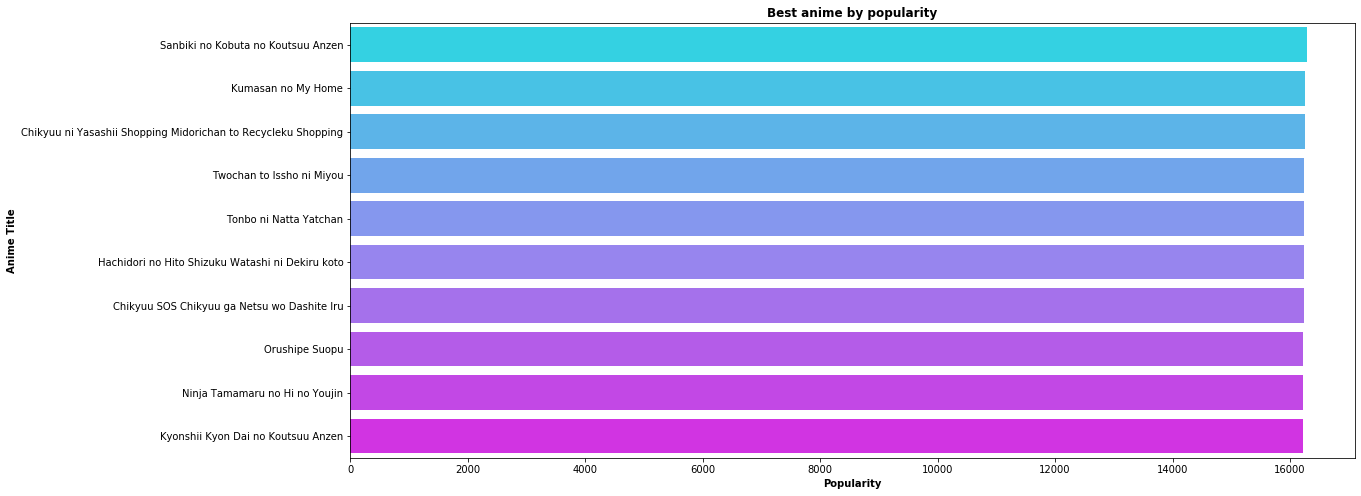

In [36]:
#plotting the top 10 anime according to their members
plt.figure(figsize=(18,8))

ax = sns.barplot(x = anime_popular['popularity'].head(10), y = anime_popular['title'].head(10), data = anime_popular, palette='cool')

plt.title('Best anime by popularity', weight = 'bold')
plt.xlabel('Popularity', weight = 'bold')
plt.ylabel('Anime Title', weight = 'bold')

#plt.savefig('best_anime using popularity.png')

# Recommending Anime according to the weighted ratings, members and popularity

In [35]:
#recommending movies based on weighted average and popularity
#normalizing the weighted average and popularity column

from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
data_scaled = min_max_scaler.fit_transform(anime_data[['weighted_avg','popularity','members']])
data_norm = pd.DataFrame(data_scaled, columns = ['weighted_avg','popularity','members'])
data_norm.head()

,weighted_avg,popularity,members
0,0.923610,0.002326,0.485284
1,0.844219,0.029014,0.123922
2,0.836889,0.009610,0.256738
3,0.655719,0.078166,0.051587
4,0.562900,0.242823,0.007747


In [37]:
#creating a score value that splits scaled weighted_avg and popularity in half
anime_data[['norm_weighted_avg','norm_popularity','norm_members']] = data_norm
anime_data['score'] = anime_data['norm_weighted_avg']*0.6 + anime_data['norm_popularity']*0.2 + anime_data['norm_members']*0.2
data_scored = anime_data.sort_values(['score'], ascending=False)
data_scored.head(2)

,anime_id,title,genres,synopsis,anime_type,producer,studio,rating,scored_by,popularity,members,anime_source,weighted_avg,norm_weighted_avg,norm_popularity,norm_members,score
3634,5114,Fullmetal Alchemist Brotherhood,"Action, Military, Adventure, Comedy, Drama, Ma...","""In order for something to be obtained, someth...",TV,"Aniplex, Square Enix, Mainichi Broadcasting Sy...",Bones,9.25,730784.0,4.0,1194518.0,Manga,9.222182,1.000000,0.000184,0.822836,0.764604
1257,1535,Death Note,"Mystery, Police, Psychological, Supernatural, ...","A shinigami, as a god of death, can kill any p...",TV,"VAP, Konami, Ashi Production, Nippon Televisio...",Madhouse,8.67,1006242.0,1.0,1451708.0,Manga,8.653711,0.905454,0.000000,1.000000,0.743272


In [38]:
#showing the normalized features and the new score  feature
data_scored[['title','norm_weighted_avg','norm_popularity','norm_members','score']].head()

,title,norm_weighted_avg,norm_popularity,norm_members,score
3634,Fullmetal Alchemist Brotherhood,1.000000,0.000184,0.822836,0.764604
1257,Death Note,0.905454,0.000000,1.000000,0.743272
5031,Steins;Gate,0.980549,0.000367,0.692826,0.726968
6383,Shingeki no Kyojin,0.875537,0.000061,0.923492,0.710033
10109,Nar Doma Manner Movie,0.987598,0.000857,0.499060,0.692542


Text(0, 0.5, 'Movie Title')

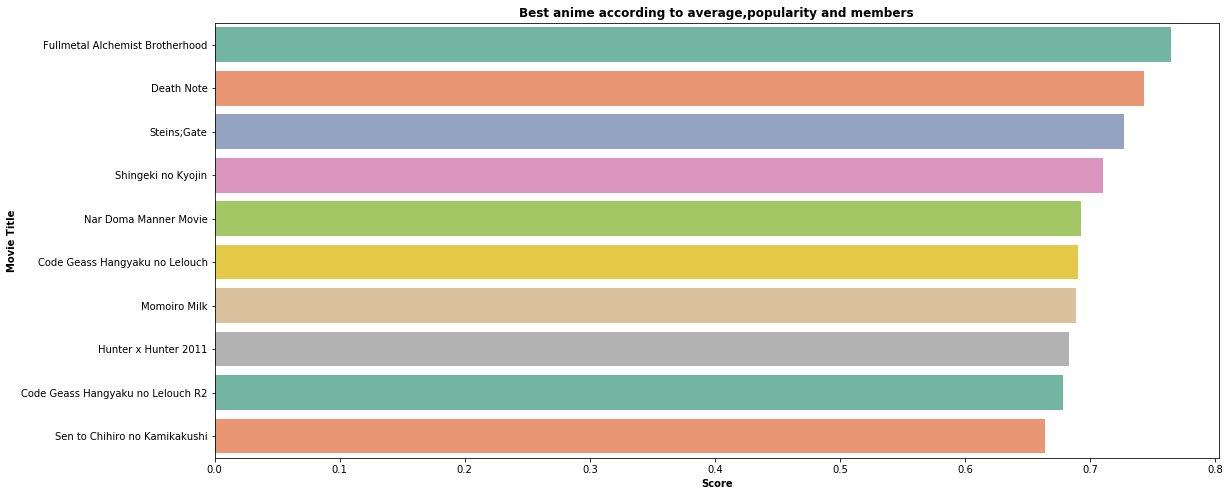

In [39]:
#plotting the top movies according to an even split between weighted avg and popularity

plt.figure(figsize=(18,8))

ax = sns.barplot(x = data_scored['score'].head(10), y = data_scored['title'].head(10), data = data_scored, palette='Set2')


plt.title('Best anime according to average,popularity and members', weight = 'bold')
plt.xlabel('Score', weight = 'bold')
plt.ylabel('Movie Title', weight = 'bold')

#plt.savefig('scored.png')